In [ ]:
!pip install gdown==v4.6.3

  Attempting uninstall: gdown
    Found existing installation: gdown 4.6.6
    Uninstalling gdown-4.6.6:
      Successfully uninstalled gdown-4.6.6


In [ ]:
!gdown 14YlgjT_M8kDrvDKEv864fs7ZyI1lMErO


Downloading...
From: https://drive.google.com/uc?id=14YlgjT_M8kDrvDKEv864fs7ZyI1lMErO
To: /content/crypto_data.csv
100% 90.0k/90.0k [00:00<00:00, 61.4MB/s]


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
import keras
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
data = pd.read_csv('/content/crypto_data.csv')

In [ ]:
data

,Date,Close (BNB),Close (BTC),Close (USDT),Close (ETH)
0,09-11-17,1.99077,7143.580078,1.00818,320.884003
1,10-11-17,1.79684,6618.140137,1.00601,299.252991
2,11-11-17,1.67047,6357.600098,1.00899,314.681000
3,12-11-17,1.51969,5950.069824,1.01247,307.907990
4,13-11-17,1.68662,6559.490234,1.00935,316.716003
...,...,...,...,...,...
1748,23-08-22,299.03000,21528.090000,1.00000,1662.770000
1749,24-08-22,296.45000,21395.020000,1.00000,1657.060000
1750,25-08-22,301.58000,21600.900000,1.00010,1696.460000
1751,26-08-22,279.60000,20260.020000,1.00000,1507.780000


In [ ]:
data = data.set_index('Date')

In [ ]:
data = data.sort_index()

In [ ]:
data

,Close (BNB),Close (BTC),Close (USDT),Close (ETH)
Date,,,,
01-01-18,8.414610,13657.200200,1.007280,772.640991
01-01-19,6.075273,3843.520020,1.018335,140.819412
01-01-20,13.689083,7200.174316,0.999836,130.802002
01-01-21,37.905010,29374.152340,1.001916,730.367554
01-01-22,527.352722,47686.812500,1.000500,3769.697021
...,...,...,...,...
31-12-17,8.635580,14156.400390,1.012260,756.732971
31-12-18,6.164732,3742.700439,1.013722,133.368256
31-12-19,13.727642,7193.599121,0.999679,129.610855


In [ ]:
data.isnull().sum()


Close (BNB)     0
Close (BTC)     0
Close (USDT)    0
Close (ETH)     0
dtype: int64

In [ ]:
data_copy=data

In [ ]:
data_copy = data.sort_values(by='Date', ascending=False)


In [ ]:
data_copy

,Close (BNB),Close (BTC),Close (USDT),Close (ETH)
Date,,,,
31-12-21,511.708313,46306.445310,1.000189,3682.632813
31-12-20,37.376034,29001.720700,1.000598,737.803406
31-12-19,13.727642,7193.599121,0.999679,129.610855
31-12-18,6.164732,3742.700439,1.013722,133.368256
31-12-17,8.635580,14156.400390,1.012260,756.732971
...,...,...,...,...
01-01-22,527.352722,47686.812500,1.000500,3769.697021
01-01-21,37.905010,29374.152340,1.001916,730.367554
01-01-20,13.689083,7200.174316,0.999836,130.802002


In [ ]:
lag = 5

In [ ]:
for i in range(1, lag + 1):
  data_copy[f'From {i} days ago'] = data_copy['Close (BTC)'].shift(i)

In [ ]:
data_copy.dropna(subset=data_copy.columns,axis=0,inplace=True)


In [ ]:
data_copy


,Close (BNB),Close (BTC),Close (USDT),Close (ETH),From 1 days ago,From 2 days ago,From 3 days ago,From 4 days ago,From 5 days ago
Date,,,,,,,,,
31-10-21,524.364441,61318.957030,1.000376,4288.074219,14156.400390,3742.700439,7193.599121,29001.720700,46306.445310
31-10-20,28.431215,13780.995120,1.000200,386.590332,61318.957030,14156.400390,3742.700439,7193.599121,29001.720700
31-10-19,20.000233,9199.584961,1.006419,183.966919,13780.995120,61318.957030,14156.400390,3742.700439,7193.599121
31-10-18,9.364960,6317.609863,0.988122,197.380997,9199.584961,13780.995120,61318.957030,14156.400390,3742.700439
31-08-21,464.418732,47166.687500,1.000529,3433.732666,6317.609863,9199.584961,13780.995120,61318.957030,14156.400390
...,...,...,...,...,...,...,...,...,...
01-01-22,527.352722,47686.812500,1.000500,3769.697021,9170.540039,3487.945313,9392.875000,33537.175780,38743.273440
01-01-21,37.905010,29374.152340,1.001916,730.367554,47686.812500,9170.540039,3487.945313,9392.875000,33537.175780
01-01-20,13.689083,7200.174316,0.999836,130.802002,29374.152340,47686.812500,9170.540039,3487.945313,9392.875000


In [ ]:
data_copy.isnull().sum()

Close (BNB)        0
Close (BTC)        0
Close (USDT)       0
Close (ETH)        0
From 1 days ago    0
From 2 days ago    0
From 3 days ago    0
From 4 days ago    0
From 5 days ago    0
dtype: int64

In [ ]:
X, Y = data_copy.drop(columns=['Close (BTC)', 'Close (BNB)', 'Close (USDT)', 'Close (ETH)']),  data_copy['Close (BTC)']

In [ ]:
X

,From 1 days ago,From 2 days ago,From 3 days ago,From 4 days ago,From 5 days ago
Date,,,,,
31-10-21,14156.400390,3742.700439,7193.599121,29001.720700,46306.445310
31-10-20,61318.957030,14156.400390,3742.700439,7193.599121,29001.720700
31-10-19,13780.995120,61318.957030,14156.400390,3742.700439,7193.599121
31-10-18,9199.584961,13780.995120,61318.957030,14156.400390,3742.700439
31-08-21,6317.609863,9199.584961,13780.995120,61318.957030,14156.400390
...,...,...,...,...,...
01-01-22,9170.540039,3487.945313,9392.875000,33537.175780,38743.273440
01-01-21,47686.812500,9170.540039,3487.945313,9392.875000,33537.175780
01-01-20,29374.152340,47686.812500,9170.540039,3487.945313,9392.875000


In [ ]:
Y


Date
31-10-21    61318.957030
31-10-20    13780.995120
31-10-19     9199.584961
31-10-18     6317.609863
31-08-21    47166.687500
                ...     
01-01-22    47686.812500
01-01-21    29374.152340
01-01-20     7200.174316
01-01-19     3843.520020
01-01-18    13657.200200
Name: Close (BTC), Length: 1748, dtype: float64

In [ ]:
data_copy = data_copy.reset_index()
data_copy.drop('Date',axis=1,inplace=True)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=False)

In [ ]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
Y_train = scaler.fit_transform(Y_train.values.reshape(-1, 1))

In [ ]:
X_train.shape

(1398, 5)

In [ ]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)

In [ ]:
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [ ]:
X_train.shape

(1398, 5, 1)

In [ ]:
from tensorflow.keras.layers import LSTM

In [ ]:
model = Sequential()
model.add(LSTM(100,  activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(LSTM(50,  activation='relu'))
model.add(Dense(1, activation='linear'))

In [ ]:
model.compile(loss=keras.losses.MeanSquaredError() , optimizer=keras.optimizers.Adam(), metrics=[keras.metrics.MeanSquaredError(), keras.metrics.MeanAbsoluteError() ])

In [ ]:
history = model.fit(X_train, Y_train, batch_size=16, validation_split=0.2, epochs=20, shuffle=False)

Epoch 1/20
70/70 [==============================] - 10s 16ms/step - loss: 0.0825 - mean_squared_error: 0.0825 - mean_absolute_error: 0.2288 - val_loss: 0.0715 - val_mean_squared_error: 0.0715 - val_mean_absolute_error: 0.2288
Epoch 2/20
70/70 [==============================] - 1s 11ms/step - loss: 0.0442 - mean_squared_error: 0.0442 - mean_absolute_error: 0.1704 - val_loss: 0.0213 - val_mean_squared_error: 0.0213 - val_mean_absolute_error: 0.1133
Epoch 3/20
70/70 [==============================] - 1s 9ms/step - loss: 0.0174 - mean_squared_error: 0.0174 - mean_absolute_error: 0.0938 - val_loss: 0.0163 - val_mean_squared_error: 0.0163 - val_mean_absolute_error: 0.0853
Epoch 4/20
70/70 [==============================] - 1s 10ms/step - loss: 0.0152 - mean_squared_error: 0.0152 - mean_absolute_error: 0.0794 - val_loss: 0.0150 - val_mean_squared_error: 0.0150 - val_mean_absolute_error: 0.0758
Epoch 5/20
70/70 [==============================] - 1s 11ms/step - loss: 0.0145 - mean_squared_error

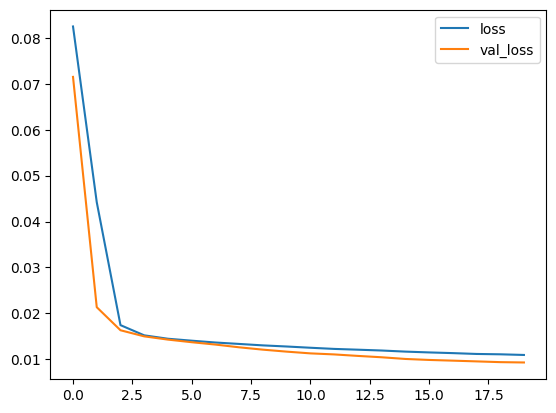

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

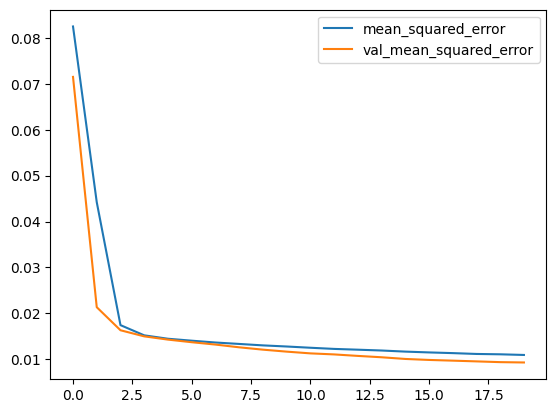

In [ ]:
plt.plot(history.history['mean_squared_error'], label='mean_squared_error')
plt.plot(history.history['val_mean_squared_error'], label='val_mean_squared_error')
plt.legend()
plt.show()